<a href="https://colab.research.google.com/github/lucas-pinto/NUIN443/blob/main/NUIN443_ps11_ISNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Set 11: Inhibition-Stabilized Networks

Several papers have used simplified versions of the Wilson-Cowan model to study the dynamics of two-population networks, including the balanced amplification paper we learned about in journal club. Despite being a linear model, we can learn a fair bit from studying this system!

Starting from the Wilson-Cowan model, we're going to ignore the effects of neurons' refractory periods and the nonlinearity of the population response function. This gives us a nice, linear 2D system of equations:

\begin{eqnarray}
\tau_e \frac{d}{dt}E &=& -E + j_{ee}E - j_{ei}I + P_E \\
\tau_i \frac{d}{dt}I &=& -I + j_{ie}E - j_{ii}I + P_I \\
\end{eqnarray}

### Problem 1: nullclines and fixed point of our system.

<font color=violet>1a. Complete the `compute_nullclines` function to find the nullclines of our 2D system as functions of I. You'll be able to check your work by plotting these nullclines for a set of parameters in problem 1c below.</font>

In [12]:
def compute_nullclines(params, I):
    tau_e    = params['tau_e']
    tau_i    = params['tau_i']
    input_e  = params['input_e']
    input_i  = params['input_i']
    j_ee     = params['j_ee']
    j_ie     = params['j_ie']
    j_ei     = params['j_ei']
    j_ii     = params['j_ii']

    nc_e = lambda I: (-j_ei*I + input_e) / (1-j_ee)
    nc_i = lambda I: (I +j_ii*I - input_i) / j_ie

    return nc_e(I), nc_i(I)

Since both nullclines are simply straight lines (right?), we can find their intersection analytically. Say we have two equations of the form
\begin{eqnarray}
y &=& m_1 x + b_1 \\
y &=& m_2 x + b_2 \\
\end{eqnarray}

then we know that at the point where they cross, these two lines have equal y-values. So we can solve for the x where this happens:
\begin{eqnarray}
m_1 x + b_1 &=& m_2 x + b_2 \\
(m_1 - m_2) x &=& b_2 - b_1 \\
x &=& \frac{b_2 - b_1}{m_1 - m_2}
\end{eqnarray}

and plug this into on of our original equations then gives the corresponding value for y:
\begin{eqnarray}
y &=& m_1 \frac{b_2 - b_1}{m_1 - m_2} + b_1 \\
\end{eqnarray}

<font color=violet>1b. Complete the `find_fixedpoint` function to compute the location of the fixed point for this model.</font>

In [13]:
def find_fixedpoint(params):
    tau_e    = params['tau_e']
    tau_i    = params['tau_i']
    input_e  = params['input_e']
    input_i  = params['input_i']
    j_ee     = params['j_ee']
    j_ie     = params['j_ie']
    j_ei     = params['j_ei']
    j_ii     = params['j_ii']
    
    m1 = -j_ei / (1-j_ee)
    b1 = input_e / (1-j_ee)
    
    m2 = (1+j_ii) / j_ie
    b2 = -input_i / j_ie
    
    

    e = m1 * ((b2-b1)/(m1-m2)) + b1
    i = m2 * ((b2-b1)/(m1-m2)) + b2

    return e,i

<font color=violet>1c. Now to see the results of these two functions you wrote, write a function that takes in the set of parameters below and plots both nullclines for I between 0 and 1, as well as marking the fixed point where they intersect. Indicate which nullcline is which in the figure legend.</font>

In [14]:
params = {
    'tau_e':    60,   # time constant of the excitatory population in ms
    'tau_i':    12,   # time constant of the inhibitory population in ms
    'input_e':  1,    # external input to the excitatory population
    'input_i':  1,    # external input to the inhibitory population
    'j_ee':     2,    # weight of excitatory input to excitatory cells
    'j_ei':     4,    # weight of inhibitory input to excitatory cells
    'j_ie':     5,    # weight of excitatory input to inhibitory cells
    'j_ii':     7     # weight of inhibitory input to inhibitory cells

}

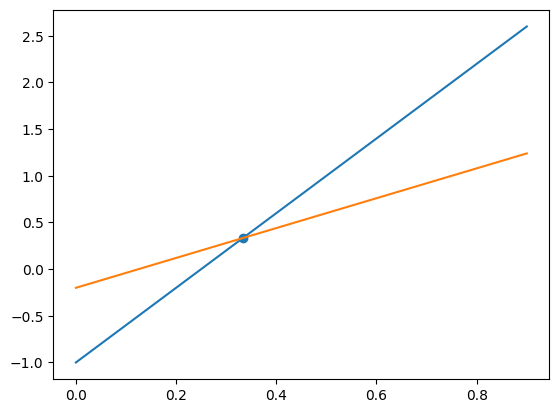

In [22]:
def plot_nullclines(params, i_min=0, i_max=1):
    i_sweep = np.arange(i_min, i_max, .1)
    nc_e_list = []
    nc_i_list = []
    for my_i in i_sweep:
        temp1, temp2 = compute_nullclines(params, my_i)
        nc_e_list.append(temp1)
        nc_i_list.append(temp2)
    plt.plot(i_sweep, nc_e_list)
    plt.plot(i_sweep, nc_i_list)
    x,y = find_fixedpoint(params)
    plt.scatter(x,y)
    
    



plot_nullclines(params)
#plt.plot(a,b)

### Problem 2: stability analysis of the fixed point.

Recall from class that we can determine how a system will behave in the neighborhood of a fixed point by writing out the Jacobian matrix and evaluating it at that fixed point. Recall also the definition of the Jacobian at a point $(E^*,I^*)$ is:

\begin{equation}
J =
\begin{bmatrix}
\frac{\partial}{\partial E} \frac{dE}{dt}(E^*,I^*) & \frac{\partial}{\partial I} \frac{dE}{dt}(E^*,I^*) \\
\frac{\partial}{\partial E} \frac{dI}{dt}(E^*,I^*) & \frac{\partial}{\partial I} \frac{dI}{dt}(E^*,I^*) \\
\end{bmatrix}
\end{equation}

<font color=violet>2a. Complete the following python function that computes the Jacobian matrix of our system, then find its Trace, Determinant, and eigenvalues for the provided set of parameters. (Hint: the values of the Jacobian for this system shouldn't depend on the point (E*,I*) at which it's computed.)</font>

In [26]:
def compute_jacobian(params, e=0, i=0):
    tau_e    = params['tau_e']
    tau_i    = params['tau_i']
    input_e  = params['input_e']
    input_i  = params['input_i']
    j_ee     = params['j_ee']
    j_ie     = params['j_ie']
    j_ei     = params['j_ei']
    j_ii     = params['j_ii']

    J = np.zeros((2,2))
    J[0,0] = j_ee-1
    J[0,1] = j_ei
    J[1,0] = j_ie
    J[1,1] = -1-j_ii

    return J

print(compute_jacobian(params))

[[ 1.  4.]
 [ 5. -8.]]


<font color=violet>2b. Based on these values, what type of fixed point does this system have? Stable vs unstable, and spiral vs source/sink?</font>

<font color=violet>2c. Complete the plotting code below to check your work- does the system behave as predicted?</font>

In [ ]:
def simulate_network(params, e0=0, i0=0, produce_plot=True):
    tau_e    = params['tau_e']
    tau_i    = params['tau_i']
    input_e  = params['input_e']
    input_i  = params['input_i']
    j_ee     = params['j_ee']
    j_ie     = params['j_ie']
    j_ei     = params['j_ei']
    j_ii     = params['j_ii']

    dedt = lambda E,I: ...
    didt = lambda E,I: ...

    T = 1000 # simulation timesteps
    e_vals = np.zeros(T)
    i_vals = np.zeros(T)
    e_vals[0] = e0  # set initial conditions of the system
    i_vals[0] = i0
    for t in range(1,T):
        e_vals[t] = ...
        i_vals[t] = ...

    if produce_plot:
        plt.plot(e_vals, label='E')
        plt.plot(i_vals, label='I')
        plt.legend();

    return e_vals, i_vals

simulate_network(params);

<font color=violet>2d. Modify your earlier `plot_nullclines` function so that it also calls `simulate_network` and plots the trajectory of your system in the phase plane.</font>

In [ ]:
def plot_nullclines_and_trajectory(params, i_min=0, i_max=1):
    ...



plot_nullclines_and_trajectory(params)

### Problem 3: dynamic regimes of the model.

<font color=violet>3a. If a network is in the ISN regime, then it will be unstable in the absence of inhibitory feedback. Test whether this model is in the ISN regime by creating a modified version of your `simulate_network` code that simulates the effect of removing/silencing inhibitory feedback in the model. Is this model an ISN?</font>

In [ ]:
## modify this code where appropriate to test if the system is an ISN.

def simulate_network_with_silencing(params, e0=0, i0=0, produce_plot=True):
    tau_e    = params['tau_e']
    tau_i    = params['tau_i']
    input_e  = params['input_e']
    input_i  = params['input_i']
    j_ee     = params['j_ee']
    j_ie     = params['j_ie']
    j_ei     = params['j_ei']
    j_ii     = params['j_ii']

    dedt = lambda E,I: ...
    didt = lambda E,I: ...

    T = 1000
    e_vals = np.zeros(T)
    i_vals = np.zeros(T)
    e_vals[0] = e0
    i_vals[0] = i0
    for t in range(1,T):
        e_vals[t] = ...
        i_vals[t] = ...

    if produce_plot:
        plt.plot(e_vals, label='E')
        plt.plot(i_vals, label='I')
        plt.legend();

    return e_vals,i_vals

simulate_network_with_silencing(params);

<font color=violet>3b. For each of the following regimes, state whether it can be produced by this network model, and if so provide a set of model parameters that generate it.</font>

<font color=violet>i. A stable system that is not in the ISN regime.</font>

<font color=violet>ii. A stable system that produces transient oscillations.</font>

<font color=violet>iii. A limit cycle.</font>

### Bonus: modeling the surround suppression experiment in Ozeki et al.
As you may have learned in Great Experiments, Ozeki et al used a modified surround suppression experiment to demonstrate that the visual cortex is operating in an inhibition-stabilized regime. <a href=https://ctn.zuckermaninstitute.columbia.edu/sites/default/files/content/Publications/2009/Ozeki%20(Schaffer),%20Inhibitory%20Stabilization%20of%20the%20Cortical%20Network%20Underlies%20Visual%20Surround%20Suppression.pdf>You can read the paper here</a>.

<font color=violet>Create a modified version of the `simulate_network` code to model an input to the excitatory population turning on at T=0 and an input to the inhibitory population turning on at T=500. Plot the activity of the simulated populations to show the paradoxical drop in inhibitory activity.</font>